<a href="https://colab.research.google.com/github/pawnzo90z/competitions/blob/master/employee_attrition_hackerearth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/employee_attrition_hackerearth')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Import Libs**

In [ ]:
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline
from sklearn.model_selection import train_test_split

test = pd.read_csv('Dataset/Test.csv')
train =pd.read_csv('Dataset/Train.csv')

In [ ]:
## concat train & test without target
train_0 = train.drop(['Attrition_rate'],axis = 1)
df = pd.concat([train_0,test],ignore_index=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                10000 non-null  object 
 1   Gender                     10000 non-null  object 
 2   Age                        9427 non-null   float64
 3   Education_Level            10000 non-null  int64  
 4   Relationship_Status        10000 non-null  object 
 5   Hometown                   10000 non-null  object 
 6   Unit                       10000 non-null  object 
 7   Decision_skill_possess     10000 non-null  object 
 8   Time_of_service            9804 non-null   float64
 9   Time_since_promotion       10000 non-null  int64  
 10  growth_rate                10000 non-null  int64  
 11  Travel_Rate                10000 non-null  int64  
 12  Post_Level                 10000 non-null  int64  
 13  Pay_Scale                  9988 non-null   floa

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [ ]:
#check value counts
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Employee_ID','Gender','Relationship_Status']]
#Print frequency of categories
for col in categorical_columns:
    print(df[col].value_counts())

Lebanon        2953
Springfield    2484
Franklin       2181
Washington     1570
Clinton         812
Name: Hometown, dtype: int64
IT                           1963
Logistics                    1648
Sales                        1389
Operarions                   1008
R&D                           991
Purchasing                    714
Accounting and Finance        679
Human Resource Management     513
Marketing                     319
Production                    292
Quality                       290
Security                      194
Name: Unit, dtype: int64
Behavioral    2535
Analytical    2501
Directive     2488
Conceptual    2476
Name: Decision_skill_possess, dtype: int64
type2    5686
type3    3346
type4     490
type0     280
type1     198
Name: Compensation_and_Benefits, dtype: int64


In [ ]:
df.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          573
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              196
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                     12
Compensation_and_Benefits      0
Work_Life_balance             16
VAR1                           0
VAR2                         794
VAR3                           0
VAR4                         954
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [ ]:
# convert gender to numeric value and change dtype to int
print(df['Gender'].value_counts())
df['Gender'][df['Gender']=='M'] = 0
df['Gender'][df['Gender']=='F'] = 1
df['Gender'] = df['Gender'].astype(np.int64)

F    5842
M    4158
Name: Gender, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#convert relationship
df['Relationship_Status'].value_counts()
df['Relationship_Status'][df['Relationship_Status']=='Married'] = 0
df['Relationship_Status'][df['Relationship_Status']=='Single'] = 1
df['Relationship_Status'] = df['Relationship_Status'].astype(np.int64)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**Imputation 1**

In [ ]:
temp_df = df.drop(['Employee_ID','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits'],axis =1)
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_filled = imputer.fit_transform(temp_df)
temp_df_1 = pd.DataFrame(df_filled,columns = temp_df.columns)
df_fi = pd.concat([temp_df_1, df[['Employee_ID','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits']]], axis=1, sort=False)
df_fi.head()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Employee_ID,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,1.0,42.0,4.0,0.0,4.0,4.0,33.0,1.0,1.0,7.0,3.0,4.0,0.7516,1.8688,2.0,4.0,5.0,3.0,EID_23371,Franklin,IT,Conceptual,type2
1,0.0,24.0,3.0,1.0,5.0,4.0,36.0,0.0,3.0,6.0,4.0,3.0,-0.9612,-0.4537,2.0,3.0,5.0,3.0,EID_18000,Springfield,Logistics,Analytical,type2
2,1.0,58.0,3.0,0.0,27.0,3.0,51.0,0.0,2.0,8.0,1.0,4.0,-0.9612,-0.4537,3.0,3.0,8.0,3.0,EID_3891,Clinton,Quality,Conceptual,type2
3,1.0,26.0,3.0,1.0,4.0,3.0,56.0,1.0,3.0,8.0,1.0,3.0,-1.8176,-0.4537,2.0,3.0,7.0,3.0,EID_17492,Lebanon,Human Resource Management,Behavioral,type2
4,1.0,31.0,1.0,0.0,5.0,4.0,62.0,1.0,3.0,2.0,3.0,1.0,0.7516,-0.4537,2.0,2.0,8.0,2.0,EID_22534,Springfield,Logistics,Conceptual,type3


**Pre-Processing**

In [ ]:
df = df_fi

In [ ]:
# convert age to group 'Young','middle_aged','senior','old'
bins= [0,27,47,66]
labels = ['Young','middle_aged','senior']
df['agegroup_'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# one-hot encode age
df = pd.get_dummies(df, columns=["agegroup_"])
#df = df.drop(['Age'],axis =1)

In [ ]:
df = pd.get_dummies(df, columns=["Hometown"])

In [ ]:
df = pd.get_dummies(df, columns=['Unit'])
df.head()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Employee_ID,Decision_skill_possess,Compensation_and_Benefits,agegroup__Young,agegroup__middle_aged,agegroup__senior,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security
0,1.0,42.0,4.0,0.0,4.0,4.0,33.0,1.0,1.0,7.0,3.0,4.0,0.7516,1.8688,2.0,4.0,5.0,3.0,EID_23371,Conceptual,type2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.0,24.0,3.0,1.0,5.0,4.0,36.0,0.0,3.0,6.0,4.0,3.0,-0.9612,-0.4537,2.0,3.0,5.0,3.0,EID_18000,Analytical,type2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1.0,58.0,3.0,0.0,27.0,3.0,51.0,0.0,2.0,8.0,1.0,4.0,-0.9612,-0.4537,3.0,3.0,8.0,3.0,EID_3891,Conceptual,type2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,26.0,3.0,1.0,4.0,3.0,56.0,1.0,3.0,8.0,1.0,3.0,-1.8176,-0.4537,2.0,3.0,7.0,3.0,EID_17492,Behavioral,type2,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1.0,31.0,1.0,0.0,5.0,4.0,62.0,1.0,3.0,2.0,3.0,1.0,0.7516,-0.4537,2.0,2.0,8.0,2.0,EID_22534,Conceptual,type3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df = pd.get_dummies(df, columns=['Decision_skill_possess'])
df.head()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Employee_ID,Compensation_and_Benefits,agegroup__Young,agegroup__middle_aged,agegroup__senior,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,1.0,42.0,4.0,0.0,4.0,4.0,33.0,1.0,1.0,7.0,3.0,4.0,0.7516,1.8688,2.0,4.0,5.0,3.0,EID_23371,type2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.0,24.0,3.0,1.0,5.0,4.0,36.0,0.0,3.0,6.0,4.0,3.0,-0.9612,-0.4537,2.0,3.0,5.0,3.0,EID_18000,type2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1.0,58.0,3.0,0.0,27.0,3.0,51.0,0.0,2.0,8.0,1.0,4.0,-0.9612,-0.4537,3.0,3.0,8.0,3.0,EID_3891,type2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1.0,26.0,3.0,1.0,4.0,3.0,56.0,1.0,3.0,8.0,1.0,3.0,-1.8176,-0.4537,2.0,3.0,7.0,3.0,EID_17492,type2,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1.0,31.0,1.0,0.0,5.0,4.0,62.0,1.0,3.0,2.0,3.0,1.0,0.7516,-0.4537,2.0,2.0,8.0,2.0,EID_22534,type3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df = pd.get_dummies(df, columns=['Compensation_and_Benefits'])
df.head()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Employee_ID,agegroup__Young,agegroup__middle_aged,agegroup__senior,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,1.0,42.0,4.0,0.0,4.0,4.0,33.0,1.0,1.0,7.0,3.0,4.0,0.7516,1.8688,2.0,4.0,5.0,3.0,EID_23371,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.0,24.0,3.0,1.0,5.0,4.0,36.0,0.0,3.0,6.0,4.0,3.0,-0.9612,-0.4537,2.0,3.0,5.0,3.0,EID_18000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1.0,58.0,3.0,0.0,27.0,3.0,51.0,0.0,2.0,8.0,1.0,4.0,-0.9612,-0.4537,3.0,3.0,8.0,3.0,EID_3891,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,1.0,26.0,3.0,1.0,4.0,3.0,56.0,1.0,3.0,8.0,1.0,3.0,-1.8176,-0.4537,2.0,3.0,7.0,3.0,EID_17492,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1.0,31.0,1.0,0.0,5.0,4.0,62.0,1.0,3.0,2.0,3.0,1.0,0.7516,-0.4537,2.0,2.0,8.0,2.0,EID_22534,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  float64
 1   Age                                10000 non-null  float64
 2   Education_Level                    10000 non-null  float64
 3   Relationship_Status                10000 non-null  float64
 4   Time_of_service                    10000 non-null  float64
 5   Time_since_promotion               10000 non-null  float64
 6   growth_rate                        10000 non-null  float64
 7   Travel_Rate                        10000 non-null  float64
 8   Post_Level                         10000 non-null  float64
 9   Pay_Scale                          10000 non-null  float64
 10  Work_Life_balance                  10000 non-null  float64
 11  VAR1                               10000 non-null  floa

Time_since_promotion = 0-1 Not likely, 1-3 highly, 3-4 very highly

In [ ]:
# convert age to group 'Young','middle_aged','senior','old'
bins= [0,1,3,4]
labels = ['Not_likely','highly','very_highly']
df['time_since_prom_'] = pd.cut(df['Time_since_promotion'], bins=bins, labels=labels, right=False)
# one-hot encode age
df = pd.get_dummies(df, columns=["time_since_prom_"])
#df = df.drop(['Age'],axis =1)

In [ ]:
!pip install catboost
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn import impute
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
#import tflearn
import tensorflow as tf
import seaborn
import warnings

from google.colab import files
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier,LGBMRegressor
from catboost import CatBoostClassifier,CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [ ]:
df = df.drop(['Employee_ID'],axis = 1)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3',
       'VAR4', 'VAR5', 'VAR6', 'VAR7', 'agegroup__Young',
       'agegroup__middle_aged', 'agegroup__senior', 'Hometown_Clinton',
       'Hometown_Franklin', 'Hometown_Lebanon', 'Hometown_Springfield',
       'Hometown_Washington', 'Unit_Accounting and Finance',
       'Unit_Human Resource Management', 'Unit_IT', 'Unit_Logistics',
       'Unit_Marketing', 'Unit_Operarions', 'Unit_Production',
       'Unit_Purchasing', 'Unit_Quality', 'Unit_R&D', 'Unit_Sales',
       'Unit_Security', 'Decision_skill_possess_Analytical',
       'Decision_skill_possess_Behavioral',
       'Decision_skill_possess_Conceptual', 'Decision_skill_possess_Directive',
       'Compensation_and_Benefits_type0', 'Compensation_and_Benefits_type1',
       'Compensation_and_Benefits_type2', 'Compen

In [ ]:
train0 = df.iloc[:7000]
test0 = df.iloc[7000:]

In [ ]:
train0.head()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,agegroup__Young,agegroup__middle_aged,agegroup__senior,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,time_since_prom__Not_likely,time_since_prom__highly,time_since_prom__very_highly
0,1.0,42.0,4.0,0.0,4.0,4.0,33.0,1.0,1.0,7.0,3.0,4.0,0.7516,1.8688,2.0,4.0,5.0,3.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0.0,24.0,3.0,1.0,5.0,4.0,36.0,0.0,3.0,6.0,4.0,3.0,-0.9612,-0.4537,2.0,3.0,5.0,3.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1.0,58.0,3.0,0.0,27.0,3.0,51.0,0.0,2.0,8.0,1.0,4.0,-0.9612,-0.4537,3.0,3.0,8.0,3.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1.0,26.0,3.0,1.0,4.0,3.0,56.0,1.0,3.0,8.0,1.0,3.0,-1.8176,-0.4537,2.0,3.0,7.0,3.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1.0,31.0,1.0,0.0,5.0,4.0,62.0,1.0,3.0,2.0,3.0,1.0,0.7516,-0.4537,2.0,2.0,8.0,2.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
test0.head()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,agegroup__Young,agegroup__middle_aged,agegroup__senior,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,time_since_prom__Not_likely,time_since_prom__highly,time_since_prom__very_highly
7000,1.0,32.0,5.0,1.0,7.0,4.0,30.0,1.0,5.0,4.0,1.0,3.0,-0.9612,-0.4537,2.0,1.0,8.0,4.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
7001,0.0,65.0,2.0,1.0,41.0,2.0,72.0,1.0,1.0,1.0,1.0,4.0,-0.9612,0.7075,1.0,2.0,8.0,2.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
7002,0.0,52.0,3.0,0.0,21.0,3.0,25.0,0.0,1.0,8.0,1.0,4.0,-0.1048,0.7075,2.0,1.0,9.0,3.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
7003,0.0,50.0,5.0,1.0,11.0,4.0,28.0,1.0,1.0,2.0,4.0,3.0,-0.1048,0.7075,2.0,2.0,8.0,3.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
7004,1.0,44.0,3.0,0.0,12.0,4.0,47.0,1.0,3.0,2.0,4.0,4.0,1.6081,0.7075,2.0,2.0,7.0,4.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
target = train.Attrition_rate
df = train0

**PCA dont need**

In [ ]:
'''
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(df)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)
'''

'\nfrom sklearn.decomposition import PCA\npca = PCA(whiten=True)\npca.fit(df)\nvariance = pd.DataFrame(pca.explained_variance_ratio_)\nnp.cumsum(pca.explained_variance_ratio_)\n'

In [ ]:
'''
pca = PCA(n_components=44,whiten=True)
pca = pca.fit(df)
dataPCA = pca.transform(df)
test0_1 = pca.transform(test0)
'''

'\npca = PCA(n_components=44,whiten=True)\npca = pca.fit(df)\ndataPCA = pca.transform(df)\ntest0_1 = pca.transform(test0)\n'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=11)

**Normalization & Standardization Dont need**

In [ ]:
'''
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)
test_fi = norm.transform(test0)
'''

'\n# data normalization with sklearn\nfrom sklearn.preprocessing import MinMaxScaler\n\n# fit scaler on training data\nnorm = MinMaxScaler().fit(X_train)\n\n# transform training data\nX_train_norm = norm.transform(X_train)\n\n# transform testing dataabs\nX_test_norm = norm.transform(X_test)\ntest_fi = norm.transform(test0)\n'

In [ ]:
'''
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
test_fi_1 = test0.copy() 

# numerical features
num_cols = ['Age','Time_of_service','VAR1','VAR3','VAR4','VAR5','VAR6','VAR7']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])
    test_fi_1[i] = scale.transform(test_fi_1[[i]])
'''

"\n# data standardization with  sklearn\nfrom sklearn.preprocessing import StandardScaler\n\n# copy of datasets\nX_train_stand = X_train.copy()\nX_test_stand = X_test.copy()\ntest_fi_1 = test0.copy() \n\n# numerical features\nnum_cols = ['Age','Time_of_service','VAR1','VAR3','VAR4','VAR5','VAR6','VAR7']\n\n# apply standardization on numerical features\nfor i in num_cols:\n    \n    # fit on training data column\n    scale = StandardScaler().fit(X_train_stand[[i]])\n    \n    # transform the training data column\n    X_train_stand[i] = scale.transform(X_train_stand[[i]])\n    \n    # transform the testing data column\n    X_test_stand[i] = scale.transform(X_test_stand[[i]])\n    test_fi_1[i] = scale.transform(test_fi_1[[i]])\n"

In [ ]:
'''
trainX = [X_train_norm, X_train_stand]
testX = [X_test_norm, X_test_stand]
'''

'\ntrainX = [X_train_norm, X_train_stand]\ntestX = [X_test_norm, X_test_stand]\n'

In [ ]:
def lets_try(X_train,y_train,X_test,y_test):
    results={}
    def test_model(clf,name):
      #LinearRegression
      lr = clf.fit(X_train, y_train)
      preds = lr.predict(X_test)
      print(name+'--->'+str(max(0,1-mean_squared_error(y_test, preds))*100))
      test_preds = lr.predict(test0)
      test_preds = np.around(test_preds, 4)
      submit = pd.DataFrame()
      submit['Employee_ID'] = test['Employee_ID'].values
      submit['Attrition_rate'] = test_preds
      submit.to_csv(name+'.csv',index=False)
      files.download(name+'.csv') 

      return (max(0,1-mean_squared_error(y_test, preds))*100)

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf,'Linear')
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf,'Ridge')
    
    clf = linear_model.BayesianRidge(compute_score=True)
    results["Bayesian Ridge"]=test_model(clf,'Bayesian Ridge')
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf,'Hubber')
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf,'Lasso')
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf,'Bagging')
    
    clf = RandomForestRegressor()
    results["RandomForestRegressor"]=test_model(clf,'RandomForestRegressor')
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf,'AdaBoost')
    
    clf = elastic_net = ElasticNetCV(cv=5, random_state=0)
    results["elastic"]=test_model(clf,'elastic')

    clf = elastic_net = GradientBoostingRegressor()
    results["GradientBoostingRegressor"]=test_model(clf,'GradientBoostingRegressor')
    
    clf = elastic_net = LGBMRegressor()
    results["LGBMRegressor"]=test_model(clf,'LGBMRegressor')
    
    clf = elastic_net = CatBoostRegressor(verbose=0)
    results["CatBoostRegressor"]=test_model(clf,'CatBoostRegressor')
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results=results.sort_values(by=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

Linear--->96.55618425928232
Ridge--->96.5568253728403
Bayesian Ridge--->96.58418678917856


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Hubber--->96.41654839970208
Lasso--->96.56200292600792
Bagging--->96.07878940269106
RandomForestRegressor--->96.3856790702832
AdaBoost--->95.6984967934292
elastic--->96.58202528601562
GradientBoostingRegressor--->96.50611466360644
LGBMRegressor--->96.36572346849348
CatBoostRegressor--->96.33438907370301


,R Square Score
Bayesian Ridge,96.584187
elastic,96.582025
Lasso,96.562003
Ridge,96.556825
Linear,96.556184
GradientBoostingRegressor,96.506115
Hubber,96.416548
RandomForestRegressor,96.385679
LGBMRegressor,96.365723
CatBoostRegressor,96.334389


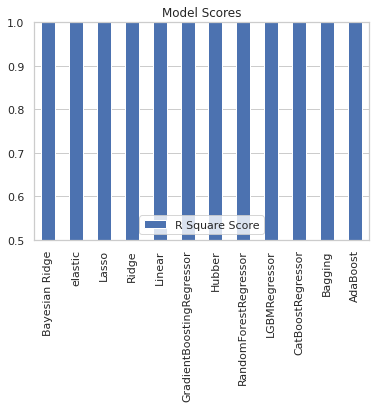

In [ ]:
lets_try(X_train_stand,y_train,X_test_stand,y_test)

In [ ]:
clf = linear_model.BayesianRidge()
n_iter = [50,70,20,100, 200, 300, 400, 500, 600, 1000, 1500]
normalize = ['True', 'False']

param_grid = dict(n_iter=n_iter,
                  normalize=normalize)

grid = GridSearchCV(estimator=clf,
                    param_grid=param_grid,
                    scoring='neg_root_mean_squared_error',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  -0.18598136467060913
Best Params:  {'n_iter': 20, 'normalize': 'True'}


[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    2.6s finished


In [ ]:
clf = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1],random_state=0,max_iter = 1000,cv = 20)
lr = clf.fit(X_train, y_train)
preds = lr.predict(X_test)
print(str(max(0,1-mean_squared_error(y_test, preds))*100))

96.58069917482345


In [ ]:
df.keys()

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3',
       'VAR4', 'VAR5', 'VAR6', 'VAR7', 'agegroup__Young',
       'agegroup__middle_aged', 'agegroup__senior', 'Hometown_Clinton',
       'Hometown_Franklin', 'Hometown_Lebanon', 'Hometown_Springfield',
       'Hometown_Washington', 'Unit_Accounting and Finance',
       'Unit_Human Resource Management', 'Unit_IT', 'Unit_Logistics',
       'Unit_Marketing', 'Unit_Operarions', 'Unit_Production',
       'Unit_Purchasing', 'Unit_Quality', 'Unit_R&D', 'Unit_Sales',
       'Unit_Security', 'Decision_skill_possess_Analytical',
       'Decision_skill_possess_Behavioral',
       'Decision_skill_possess_Conceptual', 'Decision_skill_possess_Directive',
       'Compensation_and_Benefits_type0', 'Compensation_and_Benefits_type1',
       'Compensation_and_Benefits_type2', 'Compen

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               26112     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 173,953
Trainable params: 173,953
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-2.3936892],
       [-3.4498465],
       [-2.92781  ],
       [-1.5302448],
       [-4.871729 ],
       [-2.2060742],
       [-3.8220308],
       [-2.9927402],
       [-2.4377537],
       [-2.2220788]], dtype=float32)

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
EPOCHS = 300

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.3691,  mae:0.2819,  mse:0.3691,  val_loss:0.0393,  val_mae:0.1447,  val_mse:0.0393,  
....................................................................................................
Epoch: 100, loss:0.0182,  mae:0.0934,  mse:0.0182,  val_loss:0.0449,  val_mae:0.1385,  val_mse:0.0449,  
....................................................................................................
Epoch: 200, loss:0.0018,  mae:0.0321,  mse:0.0018,  val_loss:0.0512,  val_mae:0.1567,  val_mse:0.0512,  
....................................................................................................

Text(0, 0.5, 'MAE [MPG]')

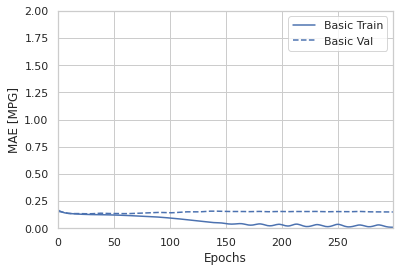

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0,2])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

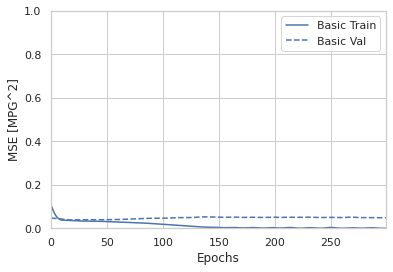

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0,1])
plt.ylabel('MSE [MPG^2]')

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.4539,  mae:0.3104,  mse:0.4539,  val_loss:0.0409,  val_mae:0.1408,  val_mse:0.0409,  
........................

Text(0, 0.5, 'MAE [MPG]')

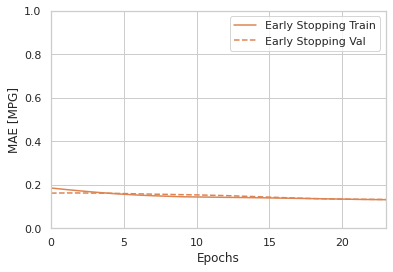

In [ ]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 1])
plt.ylabel('MAE [MPG]')

In [ ]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

55/55 - 0s - loss: 0.0357 - mae: 0.1249 - mse: 0.0357
Testing set Mean Abs Error:  0.12 MPG


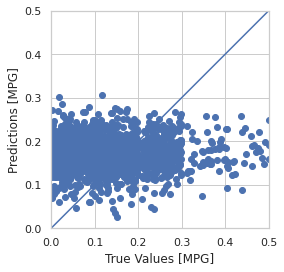

In [ ]:
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 0.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)